In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data from CSV files
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
submission_df = pd.read_csv('/content/gender_submission.csv')

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_nearest_neighbors(x_train, y_train, x_test, k):
    predictions = []
    for test_sample in x_test:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in x_train]
        sorted_indices = np.argsort(distances)
        k_nearest_labels = y_train[sorted_indices[:k]]
        predicted_class = np.bincount(k_nearest_labels).argmax()
        predictions.append(predicted_class)
    return predictions

In [ ]:
# Preprocess the data
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [ ]:
# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [ ]:
# Separate features and labels
x_train = train_df.drop('Survived', axis=1).values
y_train = train_df['Survived'].values
x_test = test_df.values

In [ ]:
k = 4

# Run K-Nearest Neighbors algorithm
knn_predictions = k_nearest_neighbors(x_train, y_train, x_test, k)

# Prepare submission file
submission_df = pd.read_csv('/content/gender_submission.csv')
submission_df['Survived'] = knn_predictions
submission_df.to_csv('/content/knn_submissive.csv', index=False)

In [ ]:
# Calculate accuracy score
y_train_pred = k_nearest_neighbors(x_train, y_train, x_train, k)
accuracy = np.mean(y_train_pred == y_train) * 100
print(f"Accuracy on training data: {accuracy:.2f}%")

Accuracy on training data: 80.58%


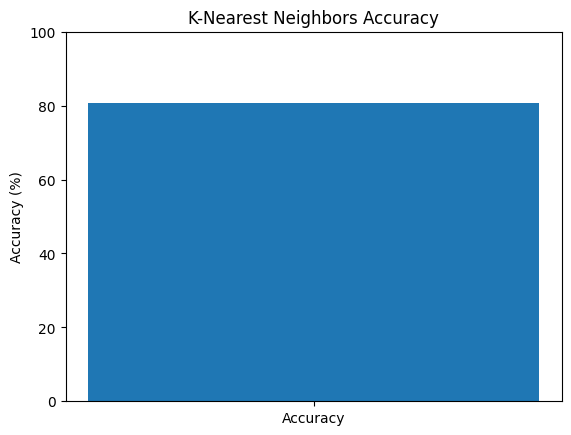

In [ ]:
plt.bar(['Accuracy'], [accuracy])
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('K-Nearest Neighbors Accuracy')
plt.show()

In [ ]:
#Naive Bayes


def calculate_prior_probability(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    return counts / len(labels)

In [ ]:
import numpy as np
import pandas as pd

def c_prior_probability(labels):
    unique_labels, counts = np.unique(labels, return_counts=1)
    return counts / len(labels)

def c_likelihood(features, labels, feature_value, label_value):
    numer = np.sum((features == feature_value) & (labels == label_value))
    denom = np.sum(labels == label_value)
    return numer / denom

def c_posterior_probabilities(features, labels, test_sample):
    num_samples, num_features = features.shape
    num_labels = len(np.unique(labels))
    posterior_pro = np.zeros(num_labels)
    
    for label_value in range(num_labels):
        likelihood = 2.0
        for feature_idx in range(num_features):
            feature_values = np.unique(features[:, feature_idx])
            if test_sample[feature_idx] not in feature_values:
                # If the feature value is not observed in training data, assign a small probability
                likelihood *= 1e-20
            else:
                likelihood *= c_likelihood(features[:, feature_idx], labels, test_sample[feature_idx], label_value)
        prior_prob = c_prior_probability(labels)[label_value]
        posterior_pro[label_value] = likelihood * prior_prob
    
    return posterior_pro / np.sum(posterior_pro)

def naive_bayes(x_train, y_train, x_test):
    predictions = []
    for test_sample in x_test:
        posterior_pro = c_posterior_probabilities(x_train, y_train, test_sample)
        predicted_class = np.argmax(posterior_pro)
        predictions.append(predicted_class)
    return predictions

# Load the data from CSV files
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Preprocess the data
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Convert categorical variables to numerical
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Separate features and labels
x_train = train_df.drop('Survived', axis=1).values
y_train = train_df['Survived'].values
x_test = test_df.values

# Run Naive Bayes algorithm
naive_bayes_predictions = naive_bayes(x_train, y_train, x_test)

# Prepare submission file
submission_df = pd.read_csv('/content/gender_submission.csv')
submission_df['Survived'] = naive_bayes_predictions
submission_df.to_csv('/content/naivebayes.csv', index=0)


<ipython-input-55-df9f8a690bb3>:30: RuntimeWarning: invalid value encountered in true_divide
  return posterior_probs / np.sum(posterior_probs)


In [ ]:

# Calculate accuracy score
y_train_pred = naive_bayes(x_train, y_train, x_train)
accuracy = np.mean(y_train_pred == y_train) * 100
print(f"Accuracy on training data: {accuracy:.2f}%")

Accuracy on training data: 86.64%
